In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import data
df = pd.read_csv('./data/data.csv')
# Source: https://www.kaggle.com/CooperUnion/cardataset
# Remove null engine hp 
df = df[~df['Engine HP'].isnull()]
df = df[~df['Engine Cylinders'].isnull()]

In [ ]:
Suppose there is a company that sells tickets to shows and our goal is to find out how is their pricing methodology.
We have been told that the price is a function that depends only on age.
We were able to buy 4 tickets online for people with different ages.

In [4]:
ages = [15, 20, 30, 34, 50, 64,  66, 77, 80, 85, 90]
prices= [130, 140, 160, 168, 200, 228, 133.0, 138.5, 140.0, 142.5, 145.0]

transform = lambda x: 100 + (2 * x) if x < 65 else 100 + (x * 0.5)

prices = []
for i in ages:
    prices.append(transform(i))

df = pd.DataFrame(list(zip(ages, prices)), columns=['age', 'price'])
df

,age,price
0,15,130.0
1,20,140.0
2,30,160.0
3,34,168.0
4,50,200.0
5,64,228.0
6,66,133.0
7,77,138.5
8,80,140.0
9,85,142.5


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['age'], y = df['price'])

In [ ]:
x = df['age'].values.reshape(-1,1)
y = df['price']

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x, y,  'bo')
plt.plot(x, y_hat, 'r');

print(model.intercept_) 
print(model.coef_)

# R2 score
print(r2_score(y, y_hat))

In [5]:
# Lets Create a categorical Variable to indicate that age is over 65
df['is_over_65'] = df['age'] < 65

In [6]:
df

,age,price,is_over_65
0,15,130.0,True
1,20,140.0,True
2,30,160.0,True
3,34,168.0,True
4,50,200.0,True
5,64,228.0,True
6,66,133.0,False
7,77,138.5,False
8,80,140.0,False
9,85,142.5,False


In [7]:
x = df[['age', 'is_over_65']]
y = df['price']

-0.17640729691382262
[  1.75849758 108.74974324]
0.9352602066455488


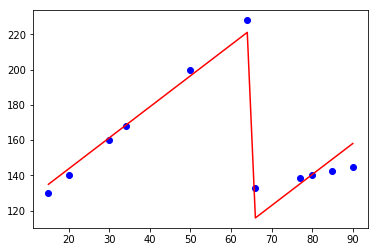

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x['age'], y,  'bo')
plt.plot(x['age'], y_hat, 'r');

print(model.intercept_) 
print(model.coef_)

# R2 score
print(r2_score(y, y_hat))

## Regression equation

${Y}_{i} = {108.57} +  {1.758}X_{i1} - {108.74}X_{i2} + {\varepsilon}$

${X}_{i1}$ = Age<br  />
${X}_{i2}$ = is_over_65